# PSET 2
### Author: Erik Butcher



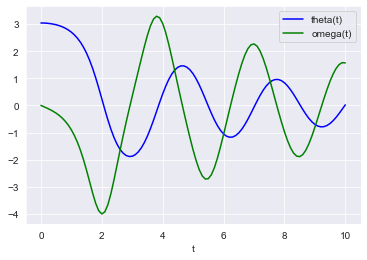

In [4]:
import numpy as np
from scipy.integrate import odeint
import seaborn as sns
import matplotlib.pyplot as plt

# 
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)


sol = odeint(pend, y0, t, args=(b, c))

sns.set_style("dark")
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

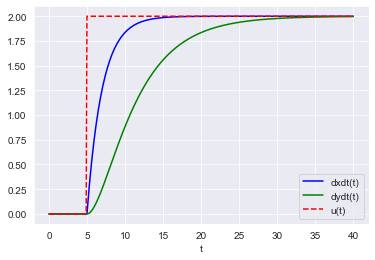

In [5]:
#function that returns dz/dt
def model(z, t):
    x = z[0]
    y = z[1]
    # u = 0 if t < 5 else 2
    dxdt = (-x+uf(t))/2.0
    dydt = (-y + x)/5.0
    return [dxdt, dydt]

t = np.linspace(0, 40, 401)
x = 0
y = 0
y0 = [x, y]
uf = lambda t: 0 if t < 5 else 2
u = np.array(list(map(uf, t)))

sol2 = odeint(model, y0, t)
plt.plot(t, sol2[:, 0], 'b', label='dxdt(t)')
plt.plot(t, sol2[:, 1], 'g', label='dydt(t)')
plt.plot(t, u, 'r--', label='u(t)', )
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

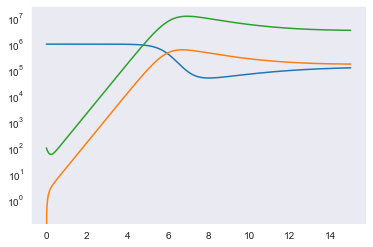

In [6]:
def model(z, t, kr):
    H = z[0]
    I = z[1]
    V = z[2]
    dhdt = kr[0]-kr[1]*H - kr[2]*H*V
    didt = kr[2]*H*V - kr[3]*I
    dvdt = -1*kr[2]*H*V-kr[4]*V+kr[5]*I
    return [dhdt, didt, dvdt]

H0 = 1e6
I0 = 0
V0 = 100

t = np.linspace(0, 15, 1000)
z = [H0, I0, V0]
kr = [1e5, 0.1, 2e-7, 0.5, 5.0, 100.0]
sol3 = odeint(model, z, t, args=(kr,))
# plt.plot(t, sol3[:, 0], 'b', label='dhdt(t)')
# plt.plot(t, sol3[:, 1], 'g', label='didt(t)')
# plt.plot(t, sol3[:, 2], 'r--', label='dvdt(t)', )
# plt.legend(loc='best')
# plt.xlabel('t')
# plt.grid()
# plt.show()

plt.semilogy(t, sol3[:,0])
plt.semilogy(t, sol3[:,1])
plt.semilogy(t, sol3[:,2])